<a href="https://colab.research.google.com/github/ignacioabalos/E337-Grupo4/blob/main/Big_Data_TP1_Grupo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte nacho-marcos

In [ ]:
import os
import pandas as pd

# Definimos la ruta base
file_path = "/Users/ignacioabalos/Desktop/E337-Grupo4/TP1/"

# Leemos los archivos como DataFrames
df_2004 = pd.read_stata(file_path + "usu_individual_T104.dta")
df_2024 = pd.read_excel(file_path + "usu_individual_T124.xlsx")

# Agregamos la columna de a√±o
df_2004["anio"] = 2004
df_2024["anio"] = 2024

# Chequeamos las bases
print(df_2004.head(5))
print(df_2024.head(5))





# Agarramos la base de datos del 2004 y filtro solo las observaciones donde la columna 'Region' sea "NEA"
df_nea = df_2004[df_2004["region"] == "NEA"]

# Guardamos la base filtrada en un nuevo archivo Stata
df_nea.to_stata("base_filtrada_nea.dta", write_index=False)

# Verificamos las primeras filas de la base filtrada
print(df_nea.head())






# Agarramos la base de datos del 2024 y filtro solo las observaciones donde la columna 'Region' sea 41
df_neaa = df_2024[df_2024["REGION"] == 41]

# Guardamos la base filtrada en un nuevo archivo Excel
df_neaa.to_excel("base_filtrada_region_41.xlsx", index=False)

# Verificamos las primeras filas de la base filtrada
print(df_neaa.head())







# Unimos las bases anteriormente filtradas usando la funcion pd.concat (quise usar .append() pero me decia que desde la version 1.4 esa funcion fue eliminada)
df_unido = pd.concat([df_nea, df_neaa], ignore_index=True)

# Guardamos la base unida en un nuevo archivo Excel
df_unido.to_excel("base_unida.xlsx", index=False)

# Verificamos las primeras filas de la base unida
print(df_unido.head())






import seaborn as sns
import matplotlib.pyplot as plt

# utilizamos la base de datos unida y procedemos a hacer el heatmap para ambos a√±os
df_unido = pd.concat([df_nea, df_neaa], ignore_index=True)

# Creamos el heatmap de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df_unido.isnull(), cmap="viridis", cbar=False, yticklabels=False)

# Agregamos t√≠tulo
plt.title("Heatmap de valores faltantes en 10 variables de la EPH de ambos a√±os", fontsize=14)

# Mostramos el gr√°fico
plt.show()




# Buscamos valores negativos en la base
valores_negativos = (df_unido < 0).any()

# Mostramos las columnas que tienen valores negativos (esto falta terminar)
print("üìå Columnas con valores negativos:")
print(valores_negativos[valores_negativos == True])



In [ ]:
#EJERCICIO 3

# Contamos la cantidad de hombres y mujeres en cada a√±o
sexo_por_anio_2004 = df_nea.groupby(["ano4", "ch04"], observed=False).size().unstack()
sexo_por_anio_2024 = df_neaa.groupby(["ANO4", "CH04"], observed=False).size().unstack()

# Renombramos las columnas (1 = Hombres, 2 = Mujeres)
sexo_por_anio_2004.columns = ["Hombres", "Mujeres"]
sexo_por_anio_2024.columns = ["Hombres", "Mujeres"]

# Creamos la figura con dos subgr√°ficos (uno al lado del otro)
fig, axes = plt.subplots(1, 2, figsize=(15, 7), sharey=True)

# Definimos colores para cada sexo
colores = ["#1f77b4", "#ff7f0e"]  # Azul para hombres, Naranja para mujeres

# Gr√°fico de 2004
sexo_por_anio_2004.T.plot(kind="bar", ax=axes[0], color=colores)
axes[0].set_title("Distribuci√≥n por Sexo - 2004", fontsize=14)
axes[0].set_xlabel("Sexo", fontsize=12)
axes[0].set_ylabel("Cantidad de Personas", fontsize=12)
axes[0].set_xticklabels(["Hombres", "Mujeres"], rotation=0)
axes[0].legend(labels=["Hombres", "Mujeres"])  # Cambiar leyenda

# Gr√°fico de 2024
sexo_por_anio_2024.T.plot(kind="bar", ax=axes[1], color=colores)
axes[1].set_title("Distribuci√≥n por Sexo - 2024", fontsize=14)
axes[1].set_xlabel("Sexo", fontsize=12)
axes[1].set_xticklabels(["Hombres", "Mujeres"], rotation=0)
axes[1].legend(labels = ["Mujeres", "Hombres"])   # Cambiar leyenda

# Ajustamos el espacio entre los gr√°ficos
plt.tight_layout()

# Guardamos la imagen si es necesario
plt.savefig("graficos_sexo_lado_a_lado.png", dpi=300)

# Mostramos los gr√°ficos
plt.show()

In [ ]:
#EJERCICIO 4

# Definimos las variables de inter√©s
variables_interes = ["CH04", "CH06", "CH07", "CH08", "NIVEL_ED", "ESTADO", "CAT_INAC", "IPCF"]

# Filtramos la base para incluir solo las columnas de inter√©s y separarndolas por ano
df_corr_2004 = df_unido[df_unido["anio"] == 2004][variables_interes]
df_corr_2024 = df_unido[df_unido["anio"] == 2024][variables_interes]

# Calculamos la matriz de correlaci√≥n
corr_matrix_2004 = df_corr_2004.corr()
corr_matrix_2024 = df_corr_2024.corr()

# Creamos la figura con subgr√°ficos (uno al lado del otro)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Graficamos la matriz de correlaci√≥n para 2004
sns.heatmap(corr_matrix_2004, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Matriz de Correlaci√≥n - 2004")
#Notamos que como hay missing values para este a√±o, la tabla de correlacion esta vac√≠a.

# Graficamos la matriz de correlaci√≥n para 2024
sns.heatmap(corr_matrix_2024, annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Matriz de Correlaci√≥n - 2024")

# Ajustamos el layout y mostramos el grafico combinado
plt.tight_layout()
plt.show()

# Versi√≥n Teo

Librer√≠as

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import zipfile

Subir archivos

In [ ]:
from google.colab import files

# Subir los archivos desde la computadora
uploaded = files.upload()



Saving EPH_usu_1_Trim_2024_xls.zip to EPH_usu_1_Trim_2024_xls (1).zip
Saving t104_dta.zip to t104_dta (1).zip


In [ ]:
# Creamos diccionario vacio
dataframes = {}

# Iteramos sobre los nombres de los archivos subidos
for zip_file_name in uploaded.keys():
  # Leemos cada archivo .zip
  with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    # Obtenemos los nombres de los archivos
    for file_name in zip_ref.namelist():
      # Leemos cada archivo debtro del zip
      with zip_ref.open(file_name) as file:
        # Verificamos si es de excel o stata para leerlo
        # adecuadamente y guardamos el dataframe en el diccionario
        # eliminando la extension
        if file_name.endswith('.xlsx'):
          df = pd.read_excel(file)
          dataframes[file_name[:-5]] = df
        elif file_name.endswith('.dta'):
          df = pd.read_stata(file)
          dataframes[file_name[:-4]] = df

print(dataframes.keys()) # Vemos los archivos que tenemos

dict_keys(['EPH_usu_1er_Trim_2024_xlsx/usu_hogar_T124', 'EPH_usu_1er_Trim_2024_xlsx/usu_individual_T124', 'Hogar_t104', 'Individual_t104'])


In [ ]:
# Creamos un dataframe con la EPH individual para cada a√±o
df_2004 = dataframes['Individual_t104']
df_2024 = dataframes['EPH_usu_1er_Trim_2024_xlsx/usu_individual_T124']

# Chequeamos las bases
print(df_2004.head(5))
print(df_2024.head(5))
print(df_2004.columns)
print(df_2024.columns)
print(df_2004.shape)
print(df_2024.shape)
print(df_2004.index)
print(df_2024.index)

     CODUSU  nro_hogar componente h15    ano4       trimestre  \
0  125098          1.0        1.0  S√≠  2004.0  1er. Trimestre   
1  125397          1.0        1.0  S√≠  2004.0  1er. Trimestre   
2  125515          1.0        1.0  S√≠  2004.0  1er. Trimestre   
3  125558          1.0        1.0  S√≠  2004.0  1er. Trimestre   
4  125558          1.0        2.0  S√≠  2004.0  1er. Trimestre   

              region mas_500              aglomerado  pondera  ... deccfr  \
0  Gran Buenos Aires       S  Ciudad de Buenos Aires   1299.0  ...     07   
1  Gran Buenos Aires       S  Ciudad de Buenos Aires   2018.0  ...     00   
2  Gran Buenos Aires       S  Ciudad de Buenos Aires   1486.0  ...     07   
3  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   
4  Gran Buenos Aires       S  Ciudad de Buenos Aires   1674.0  ...     08   

  ideccfr rdeccfr gdeccfr pdeccfr adeccfr pj1_1 pj2_1 pj3_1 idimpp  
0              06      06              04   0.0   0.0   0.0  00000  
1  

In [ ]:
# Nos aseguramos de que todos los nombres de las variables sean minusculas
df_2004.columns = df_2004.columns.str.lower()
df_2024.columns = df_2024.columns.str.lower()
print(df_2004.columns)
print(df_2024.columns)

# Vemos codigos para cada region
print(df_2004["region"].unique())
print(df_2024["region"].unique())

# Nos quedamos solo con las observaciones del NEA
df_2004_nea = df_2004[df_2004["region"] == "NEA"]
df_2024_nea = df_2024[df_2024["region"] == 41]
print(df_2004_nea.shape)
print(df_2024_nea.shape)

# Vemos las variables en comun
matching_columns = set(df_2004_nea.columns).intersection(set(df_2024_nea.columns))
print("Columnas en com√∫n:", matching_columns)

# Y tambien las que no coinciden
df_2004_unique = set(df_2004_nea.columns) - matching_columns
df_2024_unique = set(df_2024_nea.columns) - matching_columns

print("Columnas √∫nicas en df_2004:", df_2004_unique)
print("Columnas √∫nicas en df_2024:", df_2024_unique)

# Unimos ambas bases
df_combined = pd.concat([df_2004_nea, df_2024_nea], axis=0, ignore_index=True)
print(df_combined)

Index(['codusu', 'nro_hogar', 'componente', 'h15', 'ano4', 'trimestre',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr', 'pdeccfr', 'adeccfr',
       'pj1_1', 'pj2_1', 'pj3_1', 'idimpp'],
      dtype='object', length=176)
Index(['codusu', 'ano4', 'trimestre', 'nro_hogar', 'componente', 'h15',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr',
       'pdeccfr', 'adeccfr', 'pondih'],
      dtype='object', length=177)
['Gran Buenos Aires', 'NOA', 'NEA', 'Cuyo', 'Pampeana', 'Patag√≥nica']
Categories (6, object): ['Gran Buenos Aires' < 'NOA' < 'NEA' < 'Cuyo' < 'Pampeana' < 'Patag√≥nica']
[42 41 40 43 44  1]
(5343, 176)
(4850, 177)
Columnas en com√∫n: {'pp02h', 'pp03g', 'pp06e', 'pp02c3', 'pp02c8', 'h15', 'pdecifr', 'itf', 'idecifr', 'ch12', 'pp05e', 'codusu', 'pp04c99', 'nro_hogar', 'ch08', 'pp11g_ano', 'pp08f1', 'pp11c', 'v19_am', 'v4

Heatmap

{'pp02h', 'pp03g', 'pp06e', 'pp02c3', 'pp02c8', 'h15', 'pdecifr', 'itf', 'idecifr', 'ch12', 'pp05e', 'codusu', 'pp04c99', 'nro_hogar', 'ch08', 'pp11g_ano', 'pp08f1', 'pp11c', 'v19_am', 'v4_m', 'rdecocur', 'ch03', 'ch10', 'pp08f2', 'pp11o', 'pp08d4', 'ch15_cod', 'pp10e', 'pp05c_3', 'pp07g3', 'gdecocur', 'idecindr', 'pp07g1', 'v5_m', 'cat_ocup', 'pp09c', 'pp11t', 'ch04', 'pp05h', 'pp11b_cod', 'pp02c1', 'pp07e', 'ch13', 'pp02c6', 'v11_m', 'ch16', 'pp03j', 'pondera', 'pp11b2_ano', 'pp07a', 'pp05f', 'ch09', 'estado', 'pp07g4', 'pp11p', 'pp3f_tot', 'pp04d_cod', 'adecifr', 'pp07g2', 'pp11d_cod', 'pp04b1', 'pp06a', 'pp05c_2', 'pp11b1', 'v21_m', 'adeccfr', 'pp07f3', 'pp07c', 'pp04b3_mes', 'pp09a_esp', 'pp02i', 'cat_inac', 'pp11g_dia', 'pp11q', 'idecocur', 'v8_m', 'pp06h', 'nivel_ed', 'pp07d', 'v9_m', 'deccfr', 'ano4', 'pp11b2_mes', 'pp03h', 'pp05b2_dia', 'pp04a', 'v10_m', 'pp09b', 'rdeccfr', 'ch06', 'ideccfr', 'pp03c', 'pp11m', 'tot_p12', 'pp07k', 'pdecindr', 'pp04b3_ano', 'pp04b2', 'pp07f1', '

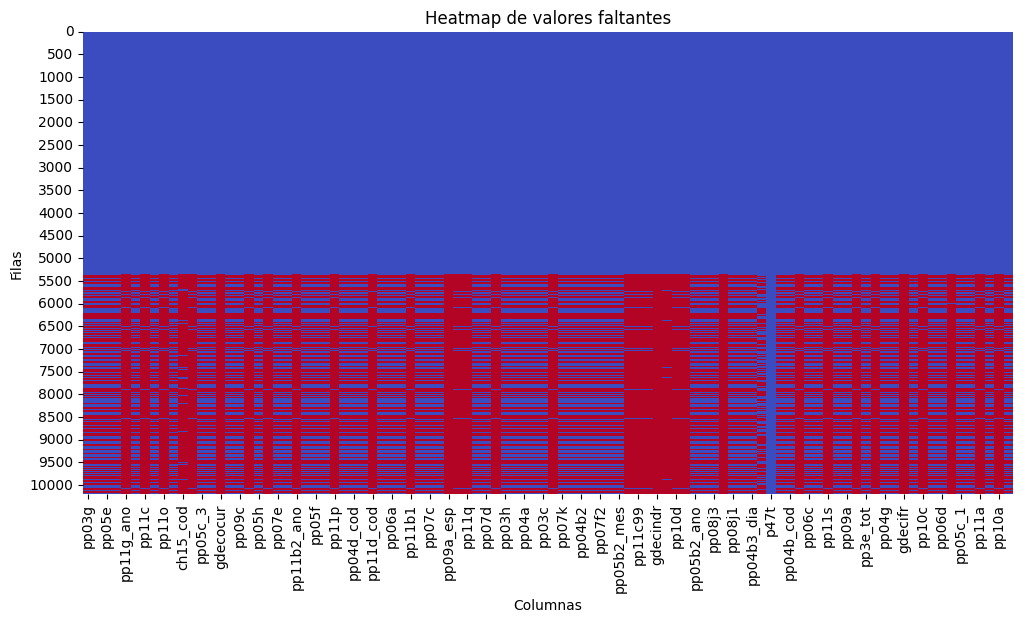

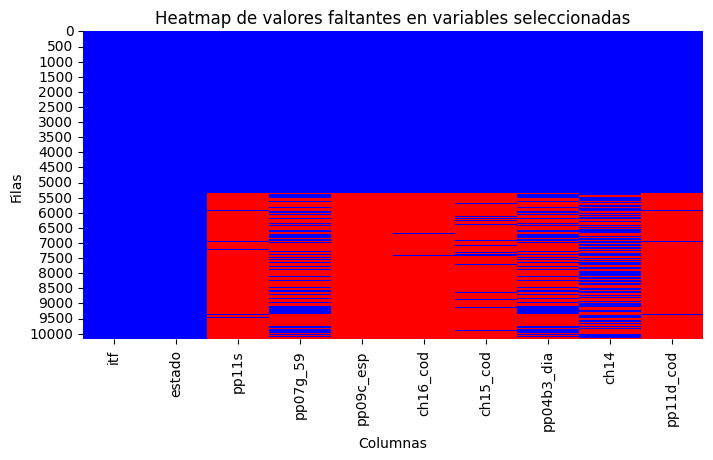

In [ ]:
print(matching_columns)
# Identificamos las columnas con valores faltantes y creamos un dataframe
columns_with_missing_values = [col for col in matching_columns if df_combined[col].isnull().any()]
df_combined_filtered = df_combined[columns_with_missing_values]

print(df_combined_filtered.columns.tolist())

# Creamos un heatmap con las variables faltantes
plt.figure(figsize=(12, 6))
sns.heatmap(df_combined_filtered.isnull(), cbar=False, cmap="coolwarm")
plt.title("Heatmap de valores faltantes")
plt.xlabel("Columnas")
plt.ylabel("Filas")
# Configurar ticks del eje y cada 500
num_rows = df_combined_filtered.shape[0]  # Total de filas en el DataFrame
y_ticks = range(0, num_rows + 1, 500)  # Crear ticks de 0 a num_rows en pasos de 500
plt.yticks(ticks=y_ticks, labels=[str(y) for y in y_ticks])  # Aplicar los ticks al eje y
plt.show()

# Elegimos 10 variables
# Tomamos 8 variables con patrones faltantes distintos y agregamos el ingreso total familiar y el estado
diez_heatmap = ['itf', 'estado', 'pp11s', 'pp07g_59', 'pp09c_esp', 'ch16_cod', 'ch15_cod', 'pp04b3_dia', 'ch14', 'pp11d_cod']

# Creamos el dataframe con estas 10 variables para realizar el heatmap
df_combined_diez = df_combined[diez_heatmap]

plt.figure(figsize=(8, 4))
sns.heatmap(df_combined_diez.isnull(), cbar=False, cmap="bwr")
plt.title("Heatmap de valores faltantes en variables seleccionadas")
plt.xlabel("Columnas")
plt.ylabel("Filas")
# Configurar ticks del eje y cada 500
num_rows10 = df_combined_diez.shape[0]  # Total de filas en el DataFrame
y_ticks10 = range(0, num_rows10 + 1, 500)  # Crear ticks de 0 a num_rows en pasos de 500
plt.yticks(ticks=y_ticks10, labels=[str(y) for y in y_ticks10])  # Aplicar los ticks al eje y
plt.show()


Limpieza de la base de datos

In [ ]:
# Iteramos buscando tipos de datos que no coinciden
for col in matching_columns:
    dtype_2004 = df_2004_nea[col].dtype
    dtype_2024 = df_2024_nea[col].dtype

    if dtype_2004 != dtype_2024:
        print(f"\n‚ö†Ô∏è Tipo de datos no coincide en columna: '{col}':")
        print(f"  df_2004_nea: {dtype_2004}")
        print(f"  df_2024_nea: {dtype_2024}")

        # Vemos 5 valores no nulos para darnos una idea de la discrepancia
        non_na_2004 = df_2004_nea[col].dropna()
        non_na_2024 = df_2024_nea[col].dropna()

        print(f"  Sample values from df_2004_nea['{col}']:", non_na_2004.sample(min(5, len(non_na_2004)), random_state=1).tolist())
        print(f"  Sample values from df_2024_nea['{col}']:", non_na_2024.sample(min(5, len(non_na_2024)), random_state=1).tolist())


# Creamos una copia del dataframe combinado para no perderelo
df_combined_tydy = df_combined.copy()




‚ö†Ô∏è Tipo de datos no coincide en columna: 'pp02h':
  df_2004_nea: category
  df_2024_nea: int64
  Sample values from df_2004_nea['pp02h']: [0.0, 'No', 'No', 0.0, 0.0]
  Sample values from df_2024_nea['pp02h']: [0, 0, 0, 1, 0]

‚ö†Ô∏è Tipo de datos no coincide en columna: 'pp03g':
  df_2004_nea: category
  df_2024_nea: float64
  Sample values from df_2004_nea['pp03g']: [0.0, 0.0, 0.0, 'No', 0.0]
  Sample values from df_2024_nea['pp03g']: [1.0, 2.0, 1.0, 2.0, 2.0]

‚ö†Ô∏è Tipo de datos no coincide en columna: 'pp06e':
  df_2004_nea: category
  df_2024_nea: float64
  Sample values from df_2004_nea['pp06e']: [0.0, 0.0, 0.0, 0.0, 0.0]
  Sample values from df_2024_nea['pp06e']: [0.0, 0.0, 0.0, 0.0, 0.0]

‚ö†Ô∏è Tipo de datos no coincide en columna: 'pp02c3':
  df_2004_nea: category
  df_2024_nea: int64
  Sample values from df_2004_nea['pp02c3']: ['S√≠', 0.0, 0.0, 0.0, 0.0]
  Sample values from df_2024_nea['pp02c3']: [0, 0, 0, 0, 0]

‚ö†Ô∏è Tipo de datos no coincide en columna: 'pp02c8':


Reemplazos de tipo de dato

In [ ]:
def convertir_float(df, cols):
    for col in cols:
        # Convertimos valores no nulos a floats
        df[col] = df[col].apply(lambda x: float(x) if pd.notna(x) else x)

def convertir_int(df, cols):
    for col in cols:
        # Convertimos valores no nulos a int
        df[col] = df[col].apply(lambda x: int(x) if pd.notna(x) else x)

def convertir_string(df, cols):
    for col in cols:
        # Convertimos valores no nulos a string
        df[col] = df[col].apply(lambda x: str(x) if pd.notna(x) else x)

def convertir_categorical(df, cols):
    for col in cols:
        # Convertimos la columna a tipo categor√≠a
        df[col] = df[col].astype('category')


# Observamos valores unicos de variables
print(df_combined_tydy["ch06"].unique())

def convertir_num_nan(df, cols):
    """
    Convertimos valores a numericos y forzamos NaN en aquellos que no lo son.
    Esto es para respuestas de texto cuando deber√≠amos tener numeros seg√∫n la pregunta

    Par√°metros:
    - df (pd.DataFrame): DataFrame a modificar.
    - cols (lista): Lista con nombre/s de columnas para convertir.
    """
    for col in cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        print(f"Valores √∫nicos en columna '{col}' despu√©s de modificaci√≥n:", df[col].unique())

# Aplicamos la funcion
convertir_num_nan(df_combined_tydy, ["ch06"])


# Definimos las listas para convertir
cols_to_int = ['ch06', 'ano4']
cols_to_float = []
cols_to_string = []
cols_to_categorical = []


# Aplicamos la funci√≥n de conversi√≥n con las listas definidas
convertir_int(df_combined_tydy, cols_to_int)

# convertir_float(df_combined_tydy, cols_to_float)
# convertir_string(df_combined_tydy, cols_to_string)
# convertir_categorical(df_combined_tydy, cols_to_categorical)

# Verificamos
print(df_combined_tydy.dtypes)

[76.0 71.0 65.0 34.0 13.0 11.0 9.0 88.0 36.0 46.0 22.0 26.0 2.0 69.0 49.0
 47.0 16.0 39.0 35.0 37.0 40.0 14.0 12.0 7.0 43.0 42.0 51.0 25.0 18.0 27.0
 10.0 5.0 1.0 30.0 6.0 32.0 24.0 'Menos de 1 a√±o' 23.0 45.0 59.0 93.0 56.0
 55.0 15.0 8.0 38.0 31.0 20.0 28.0 33.0 17.0 48.0 21.0 52.0 54.0 41.0 19.0
 44.0 66.0 4.0 64.0 62.0 61.0 29.0 73.0 58.0 60.0 68.0 86.0 81.0 3.0 83.0
 57.0 50.0 80.0 70.0 87.0 67.0 53.0 74.0 72.0 90.0 75.0 77.0 89.0 63.0
 79.0 82.0 84.0 95.0 78.0 '98 y m√°s a√±os' 85.0 91.0 -1 96 94 92]
Valores √∫nicos en columna 'ch06' despu√©s de modificaci√≥n: [76. 71. 65. 34. 13. 11.  9. 88. 36. 46. 22. 26.  2. 69. 49. 47. 16. 39.
 35. 37. 40. 14. 12.  7. 43. 42. 51. 25. 18. 27. 10.  5.  1. 30.  6. 32.
 24. nan 23. 45. 59. 93. 56. 55. 15.  8. 38. 31. 20. 28. 33. 17. 48. 21.
 52. 54. 41. 19. 44. 66.  4. 64. 62. 61. 29. 73. 58. 60. 68. 86. 81.  3.
 83. 57. 50. 80. 70. 87. 67. 53. 74. 72. 90. 75. 77. 89. 63. 79. 82. 84.
 95. 78. 85. 91. -1. 96. 94. 92.]
codusu         object
nro_ho

Eliminaci√≥n de valores negativos


In [ ]:
def identify_negatives(df, cols):
    """
    Identifica e imprime filas que contienen n√∫meros negativos en las columnas especificadas del DataFrame.

    Par√°metros:
    - df (pd.DataFrame): DataFrame a modificar.
    - cols (lista): Lista con nombre/s de columnas para identificar.
    """
    for col in cols:
        # Filtra filas donde hay valores negativos
        negative_rows = df[df[col] < 0]

        if not negative_rows.empty:
            print(f"Se encontraron valores negativos en la columna '{col}':")

            # Imprime filas con valores negativos, mostrando solo la columna relevante
            print(negative_rows[[col]])

        else:
            print(f"No se encontraron valores negativos en la columna '{col}'.")

# Especificamos las columnas que se deben inspeccionar en busca de valores negativos
id_negativos = ['ipcf', 'ch06']

# Llamamos a la funci√≥n
identify_negatives(df_combined_tydy, id_negativos)


def replace_negs(df, cols):
    """
    Reemplaza n√∫meros negativos con NaN en las columnas especificadas del DataFrame.

    Par√°metros:
    - df (pd.DataFrame): DataFrame a modificar.
    - cols (lista): Lista con nombre/s de columnas para reemplazar.
    """
    for col in cols:
        df[col] = df[col].apply(lambda x: np.nan if pd.notna(x) and x < 0 else x)

# Lista con columnas en las que vimos numeros negativos
hay_negativos = ['ch06']

# Llamamos a la funci√≥n
replace_negs(df_combined_tydy, hay_negativos)

# Verificamos que ya no haya negativos
for col in hay_negativos:
    print(f"Unique values in '{col}':", df_combined_tydy[col].unique())

No se encontraron valores negativos en la columna 'ipcf'.
Se encontraron valores negativos en la columna 'ch06':
       ch06
5368   -1.0
5456   -1.0
5670   -1.0
5839   -1.0
5876   -1.0
5923   -1.0
6286   -1.0
6328   -1.0
6654   -1.0
6724   -1.0
6880   -1.0
7068   -1.0
7349   -1.0
7676   -1.0
7719   -1.0
7808   -1.0
7939   -1.0
7952   -1.0
8192   -1.0
8215   -1.0
8439   -1.0
8504   -1.0
8521   -1.0
8522   -1.0
8554   -1.0
8770   -1.0
8771   -1.0
8791   -1.0
8810   -1.0
8977   -1.0
8978   -1.0
8996   -1.0
9083   -1.0
9125   -1.0
9617   -1.0
9810   -1.0
9886   -1.0
10031  -1.0
10036  -1.0
10090  -1.0
Unique values in 'ch06': [76. 71. 65. 34. 13. 11.  9. 88. 36. 46. 22. 26.  2. 69. 49. 47. 16. 39.
 35. 37. 40. 14. 12.  7. 43. 42. 51. 25. 18. 27. 10.  5.  1. 30.  6. 32.
 24. nan 23. 45. 59. 93. 56. 55. 15.  8. 38. 31. 20. 28. 33. 17. 48. 21.
 52. 54. 41. 19. 44. 66.  4. 64. 62. 61. 29. 73. 58. 60. 68. 86. 81.  3.
 83. 57. 50. 80. 70. 87. 67. 53. 74. 72. 90. 75. 77. 89. 63. 79. 82. 84.
 95. 

Reemplazo de categ√≥ricas y Eliminacion de valores sin sentido

In [ ]:
def map_with_general_handling(df, column, reverse_mapping, problematic_values=None):
    """
    Asigna valores en la columna especificada seg√∫n el diccionario de asignaci√≥n inversa.
    Maneja valores num√©ricos y strings para que estos coincidan.
    Par√°metros:
    - df (pd.DataFrame): DataFrame que se modificar√°.
    - column (str): El nombre de la columna que se asignar√°.
    - reverse_mapping (dict): Un diccionario para asignar categor√≠as a valores num√©ricos.
    - problematic_values ‚Äã‚Äã(set): Conjunto opcional de valores problem√°ticos conocidos que se reemplazar√°n con NaN.
    """
    print(f"Valores unicos en '{column}' antes del mapeo:", df[column].unique())

    df[column] = df[column].apply(
        lambda x: reverse_mapping.get(x, np.nan) if pd.notna(x) and isinstance(x, str) else x
    )

    if problematic_values:
        df[column] = df[column].apply(lambda x: np.nan if x in problematic_values else x)

    print(f"Valores unicos en '{column}' despu√©s del mapeo:", df[column].unique())



# Por las dudas vamos a copiar de nuevo el dataframe
df_combined_tydy2 = df_combined_tydy.copy()


# Mapear y homogeneizar valores

# ch04: Genero
ch04_mapping = {"Var√≥n": 1, "Mujer": 2}
map_with_general_handling(df_combined_tydy2, 'ch04', ch04_mapping)

# ch07: Relaci√≥n/estado civil
ch07_mapping = {
    "Unido": 1, "Casado": 2, "Separado o divorciado": 3,
    "Viudo": 4, "Soltero": 5
}
map_with_general_handling(df_combined_tydy2, 'ch07', ch07_mapping)


# ch08: Cobertura de salud
ch08_mapping = {
    "Obra social (incluye PAMI)": 1,
    "Mutual/Prepaga/Servicio de emergencia": 2,
    "Planes y seguros p√∫blicos": 3,
    "No paga ni le descuentan": 4,
    "Ns./Nr.": 9,
    "Obra social y mutual/prepaga/servicio de emergencia": 12,
    "Obra social y Planes y Seguros P√∫blicos": 13,
    "Mutual /prepaga / servicio de emergencia / Planes y Seguros P√∫blicos": 23,
    "Obra social, mutual / prepaga / servicio de emergencia y Planes y Seguros P√∫blicos": 123
}
map_with_general_handling(df_combined_tydy2, 'ch08', ch08_mapping)


# nivel_ed: Nivel educativo
nivel_ed_mapping = {
    "Primaria Incompleta (incluye educaci√≥n especial)": 1,
    "Primaria Completa": 2,
    "Secundaria Incompleta": 3,
    "Secundaria Completa": 4,
    "Superior Universitaria Incompleta": 5,
    "Superior Universitaria Completa": 6,
    "Sin instrucci√≥n": 7,
    "Ns./Nr.": 9
}
map_with_general_handling(df_combined_tydy2, 'nivel_ed', nivel_ed_mapping)


# estado: Situaci√≥n laboral
estado_mapping = {
    "Entrevista individual no realizada (no respuesta al cuestion)": 0,
    "Ocupado": 1, "Desocupado": 2, "Inactivo": 3, "Menor de 10 a√±os": 4
}
map_with_general_handling(df_combined_tydy2, 'estado', estado_mapping)


# cat_inac: Categor√≠a de inactividad
cat_inac_mapping = {
    "Jubilado/pensionado": 1, "Rentista": 2, "Estudiante": 3,
    "Ama de casa": 4, "Menor de 6 a√±os": 5, "Discapacitado": 6, "Otros": 7
}

# Ac√° vimos que hay un 0.0 que no corresponde a las respuestas esperadas
map_with_general_handling(df_combined_tydy2, 'cat_inac', cat_inac_mapping, problematic_values={0.0})


# Chequeamos el resultado
print(df_combined_tydy2[['nivel_ed', 'ch04', 'ch07', 'ch08', 'estado', 'cat_inac']])


Valores unicos en 'ch04' antes del mapeo: ['Mujer' 'Var√≥n' 2 1]
Valores unicos en 'ch04' despu√©s del mapeo: [2 1]
Valores unicos en 'ch07' antes del mapeo: ['Unido' 'Viudo' 'Soltero' 'Casado' 'Separado o divorciado' 4 5 2 3 1]
Valores unicos en 'ch07' despu√©s del mapeo: [1 4 5 2 3]
Valores unicos en 'ch08' antes del mapeo: ['Obra social (incluye PAMI)' 'No paga ni le descuentan'
 'Mutual/Prepaga/Servicio de emergencia'
 'Obra social y mutual/prepaga/servicio de emergencia'
 'Planes y seguros p√∫blicos' 'Ns./Nr.' 1 4 12 3 2 9]
Valores unicos en 'ch08' despu√©s del mapeo: [ 1  4  2 12  3  9]
Valores unicos en 'nivel_ed' antes del mapeo: ['Superior Universitaria Completa'
 'Primaria Incompleta (incluye educaci√≥n especial)'
 'Secundaria Incompleta' 'Primaria Completa'
 'Superior Universitaria Incompleta' 'Sin instrucci√≥n'
 'Secundaria Completa' 4 3 7 6 5 2 1]
Valores unicos en 'nivel_ed' despu√©s del mapeo: [6 1 3 2 5 7 4]
Valores unicos en 'estado' antes del mapeo: ['Inactivo' 'Ocupa

Ejercicio 3

[2004 2024]
int64


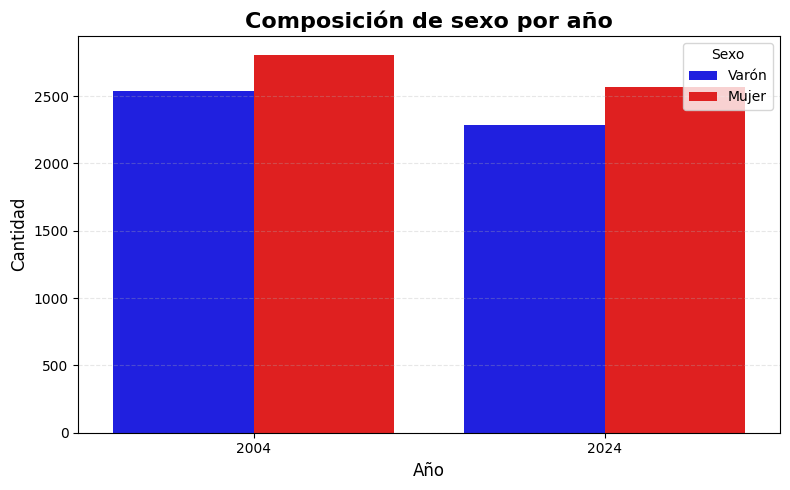

In [ ]:
# Nos aseguramos de tener los formatos correctos
print(df_combined_tydy2["ano4"].unique())
print(df_combined_tydy2["ano4"].dtype)

# Agrupar por a√±o y g√©nero, luego contar las ocurrencias
gender_mapping = {
    1: "Var√≥n",
    2: "Mujer"}

composition = df_combined_tydy2.groupby(['ano4', 'ch04']).size().reset_index(name='count')

# Mapeamos el g√©nero al diccionario que definimos
composition['Gender'] = composition['ch04'].map(gender_mapping)

# Definimos colores personalizados para los g√©neros
custom_palette = {
    'Var√≥n': 'blue',
    'Mujer': 'red' }

# Ploteo
plt.figure(figsize=(8, 5))
sns.barplot(data=composition, x='ano4', y='count', hue='Gender', palette=custom_palette)

# Ajustes
plt.title("Composici√≥n de sexo por a√±o", fontsize=16, fontweight='bold')
plt.xlabel("A√±o", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.legend(title="Sexo", loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Mostramos la figura
plt.tight_layout()
plt.show()

Ejercicio 4

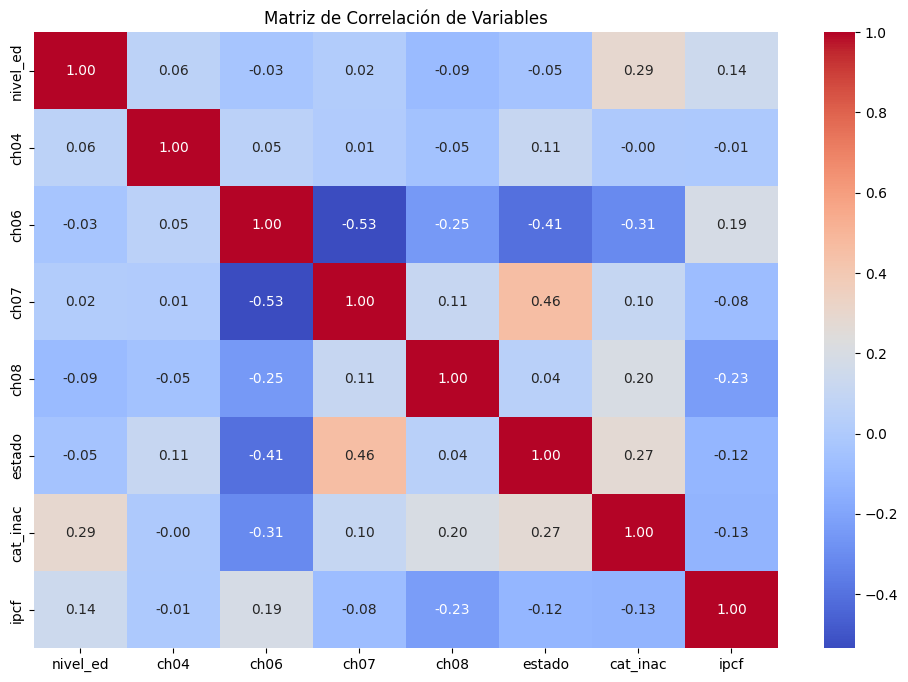

In [ ]:
# Matriz de correlaci√≥n entre las variables
vars_corrmatrix = ['nivel_ed', 'ch04', 'ch06', 'ch07', 'ch08', 'estado', 'cat_inac', 'ipcf']

plt.figure(figsize=(12, 8))
corrmatrix = df_combined_tydy2[vars_corrmatrix].corr()
sns.heatmap(corrmatrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlaci√≥n de Variables')
plt.show()

Ejercicio 5

In [ ]:
def contador(df, columna, condicion, anos=None):
    """
    Cuenta la cantidad de veces que se cumpla la condici√≥n en una columna.

    Par√°metros:
    - df (pd.DataFrame): El DataFrame que se analizar√°.
    - columna (str): El nombre de la columna donde se contar√°n las ocurrencias.
    - condici√≥n: La condici√≥n para el recuento en la columna especificada.
    - a√±os (list): Una lista de a√±os por los que se filtrar√°n los datos (opcional).

    Devuelve:
    - int: El recuento de veces que la condici√≥n aparece en la columna.
    """
    # Si se proporciona anos, filtrar por a√±o
    if anos:
        df = df[df['ano4'].isin(anos)]

    return (df[columna] == condicion).sum()

# Contamos la cantidad de desocupados e inactivos en total:
print(f"Hay {contador(df_combined_tydy2, 'estado', 2)} desocupados")
print(f"Hay {contador(df_combined_tydy2, 'estado', 3)} inactivos")

# Creamos un diccionario que vaya de valores a definiciones
estado_dict = {
    0: "Entrevista individual no realizada (no respuesta al cuestionario)",
    1: "Ocupado",
    2: "Desocupado",
    3: "Inactivo",
    4: "Menor de 10 a√±os"
}

def medias(df, columna_ref, columna_calc, condicion, anos=[2004, 2024]):
    """
    Calcula la media de una columna espec√≠fica seg√∫n una condici√≥n y uno o m√°s a√±os.

    Par√°metros:
    - df (pd.DataFrame): El DataFrame que se analizar√°.
    - columna_ref (str): El nombre de la columna que se usar√° para filtrar la condici√≥n.
    - columna_calc (str): El nombre de la columna para la que se calcular√° la media.
    - condicion (n): La condici√≥n para filtrar los datos en columna_ref.
    - anos (list): Los a√±os por los que se filtrar√° (el valor predeterminado es [2004, 2024]).

    Devuelve:
    - dict: Un diccionario con los valores medios de cada a√±o y la media total.
    """
    # Diccionario para almacenar valores medios de cada a√±o y la media total
    mean_values = {}

    # Calcular la media para cada a√±o
    for ano in anos:
        df_filtered = df[(df[columna_ref] == condicion) & (df['ano4'] == ano)]
        mean_values[ano] = df_filtered[columna_calc].mean()

    # Calcular la media total (ignorando el filtro de a√±o)
    df_filtered_total = df[df[columna_ref] == condicion]
    mean_values["Total"] = df_filtered_total[columna_calc].mean()

    return mean_values


# Creamos una lista para luego aplicar la funci√≥n
# Lo hacemos con Ocupado, Desocupado e Inactivo
condiciones = [1, 2, 3]

for condicion in condiciones:
    # Obtener la frase correspondiente a la condici√≥n
    condition_phrase = estado_dict.get(condicion, f"Condicion {condicion}")

    # Obtener los valores medios para cada a√±o (2004 y 2024) y la media total
    mean_by_year = medias(df_combined_tydy2, 'estado', 'ipcf', condicion)

    # Resultado de cada a√±o y el total
    for ano, mean in mean_by_year.items():
        print(f"La media de ingreso per c√°pita familiar (IPCF) para la condici√≥n '{condition_phrase}' "
              f"{'en el a√±o ' + str(ano) if ano != 'Total' else 'en total'} es {round(mean, 2)} pesos")


Hay 342 desocupados
Hay 4284 inactivos
La media de ingreso per c√°pita familiar (IPCF) para la condici√≥n 'Ocupado' en el a√±o 2004 es 244.71 pesos
La media de ingreso per c√°pita familiar (IPCF) para la condici√≥n 'Ocupado' en el a√±o 2024 es 144161.96 pesos
La media de ingreso per c√°pita familiar (IPCF) para la condici√≥n 'Ocupado' en total es 78144.54 pesos
La media de ingreso per c√°pita familiar (IPCF) para la condici√≥n 'Desocupado' en el a√±o 2004 es 148.14 pesos
La media de ingreso per c√°pita familiar (IPCF) para la condici√≥n 'Desocupado' en el a√±o 2024 es 85540.11 pesos
La media de ingreso per c√°pita familiar (IPCF) para la condici√≥n 'Desocupado' en total es 31858.02 pesos
La media de ingreso per c√°pita familiar (IPCF) para la condici√≥n 'Inactivo' en el a√±o 2004 es 196.08 pesos
La media de ingreso per c√°pita familiar (IPCF) para la condici√≥n 'Inactivo' en el a√±o 2024 es 119954.72 pesos
La media de ingreso per c√°pita familiar (IPCF) para la condici√≥n 'Inactivo' en

Ejercicio 6

In [ ]:
# Contamos quienes no respondieron
print(f"Hay {contador(df_combined_tydy2, 'estado', 0)} personas que no respondieron su condici√≥n de actividad")
print(f"Hay {contador(df_combined_tydy2, 'ipcf', 0)} personas que no respondieron su ingreso per c√°pita familiar")

# Filtrar el DataFrame para las personas que respondieron (estado != 0)
respondieron = df_combined_tydy2[df_combined_tydy2['estado'] != 0]

# Filtramos para personas que no respondieron (estado == 0)
norespondieron = df_combined_tydy2[df_combined_tydy2['estado'] == 0]

# Guardamos cada dataframe como base de excel
respondieron.to_excel('respondieron.xlsx', index=False)
norespondieron.to_excel('norespondieron.xlsx', index=False)


Hay 6 personas que no respondieron su condici√≥n de actividad
Hay 983 personas que no respondieron su ingreso per c√°pita familiar


Ejercicio 7

   estado  PEA
0     3.0  0.0
1     3.0  0.0
2     1.0  1.0
3     1.0  1.0
4     3.0  0.0


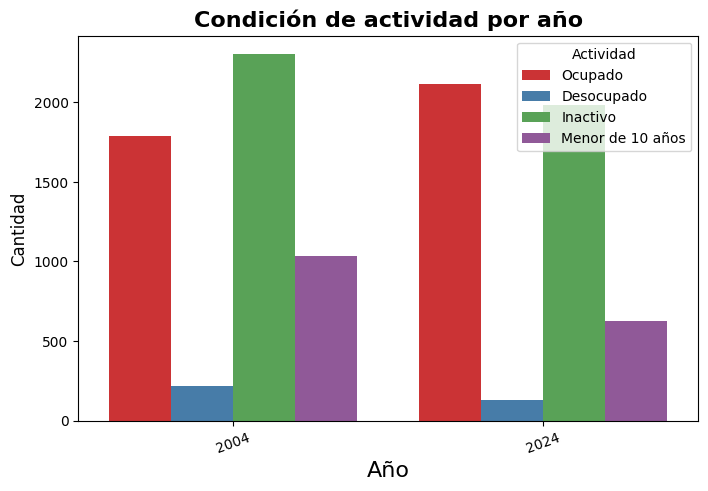

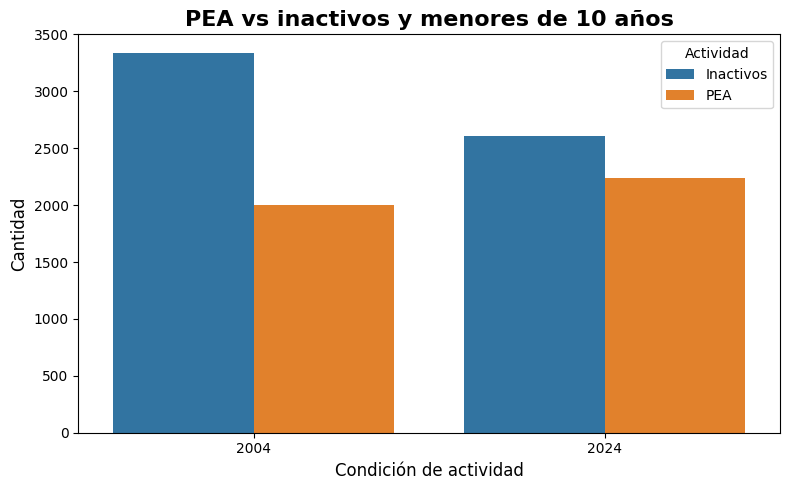

In [ ]:
# Iterar sobre la columna 'estado' y establecer la nueva columna 'PEA'
# Asignamos valor 1 si est√°n ocupados o desocupados. 0 sino
respondieron.loc[(respondieron['estado'] == 1) | (respondieron['estado'] == 2), 'PEA'] = 1
respondieron.loc[respondieron['estado'].isin([3, 4]), 'PEA'] = 0

# Chequeamos el resultado
print(respondieron[['estado', 'PEA']].head())

# Diccionario que mapea el valor a la descripci√≥n
pea_dict = {
    1: "PEA",
    0: "Inactivos"
}

# Agrupamos por a√±o y actividad
composition = respondieron.groupby(['ano4', 'estado']).size().reset_index(name='count')

composition['Actividad'] = composition['estado'].map(estado_dict)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=composition, x='ano4', y='count', hue='Actividad', palette='Set1')

# Customizaci√≥n
plt.title("Condici√≥n de actividad por a√±o", fontsize=16, fontweight='bold')
plt.xlabel("A√±o", fontsize=16)
plt.ylabel("Cantidad", fontsize=12)
plt.xticks(rotation=20)
plt.legend(title="Actividad", loc="upper right")



# Plot 2: PEA == 1 vs PEA == 0

# Agrupamos por a√±o y PEA
pea_composition = respondieron.groupby(['ano4','PEA']).size().reset_index(name='count')
pea_composition['Actividad'] = pea_composition['PEA'].map(pea_dict)

plt.figure(figsize=(8, 5))
sns.barplot(data=pea_composition, x='ano4', y='count', hue='Actividad', palette='tab10')

# Detalles est√©ticos para la comparaci√≥n
plt.title("PEA vs inactivos y menores de 10 a√±os", fontsize=16, fontweight='bold')
plt.xlabel("Condici√≥n de actividad", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.xticks(ticks=[0, 1])
plt.legend(title="Actividad", loc="upper right")

# Mostramos los plots
plt.tight_layout()
plt.show()

Ejercicio 8

In [ ]:
# Iteramos sobre la columna 'ch06' y establecemos la nueva columna 'PET'

# PET == 1 si respondieron aquellos menores de 65 a√±os e iguales o mayores de 15. == 0 sino
respondieron.loc[(respondieron['ch06'] < 65) & (respondieron['ch06'] >= 15), 'PET'] = 1
respondieron.loc[(respondieron['ch06'] >= 65) & (respondieron['ch06'] < 15), 'PET'] = 0

# Chequear el resultado
print(respondieron[['ch06', 'PET']].sample(10))

pet_dict = {
    1: "PET",
    0: "Sin edad para trabajar"
}

# Plot: PET por a√±o (ano4)
composition_pet = respondieron.groupby(['ano4', 'PET']).size().reset_index(name='count')

composition_pet['Actividad'] = composition_pet['PET'].map(pet_dict)

plt.figure(figsize=(8, 6))
sns.barplot(data=composition_pet, x='ano4', y='count', hue='Actividad', palette='Set2')

# Personalizacion del gr√°fico
plt.title("PET vs Sin edad para trabajar", fontsize=16, fontweight='bold')
plt.xlabel("A√±o", fontsize=12)
plt.ylabel("Cantidad", fontsize=12)
plt.legend(title="PET", loc="upper right")
plt.xticks(ticks=[0, 1])

plt.tight_layout()
plt.show()

      ch06  PET
955   16.0  1.0
3361   NaN  NaN
9438  26.0  1.0
7845  60.0  1.0
4540  26.0  1.0
8222  55.0  1.0
2685  57.0  1.0
6522  37.0  1.0
2109   1.0  0.0
2312  29.0  1.0


Ejercicio 9

      estado  desocupado
6567     3.0         0.0
1505     1.0         0.0
9733     3.0         0.0
1914     1.0         0.0
6969     1.0         0.0
...      ...         ...
7140     4.0         0.0
3000     3.0         0.0
2855     4.0         0.0
438      3.0         0.0
5253     1.0         0.0

[100 rows x 2 columns]
La cantidad de personas desocupadas en el a√±o 2004 fue 215
La cantidad de personas desocupadas en el a√±o 2024 fue 127


<ipython-input-154-d166a7220119>:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{float(y * 100)}' for y in ax.get_yticks()]) # Queremos ver porcentajes
<ipython-input-154-d166a7220119>:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, rotation=0, ha='center', fontsize=10)


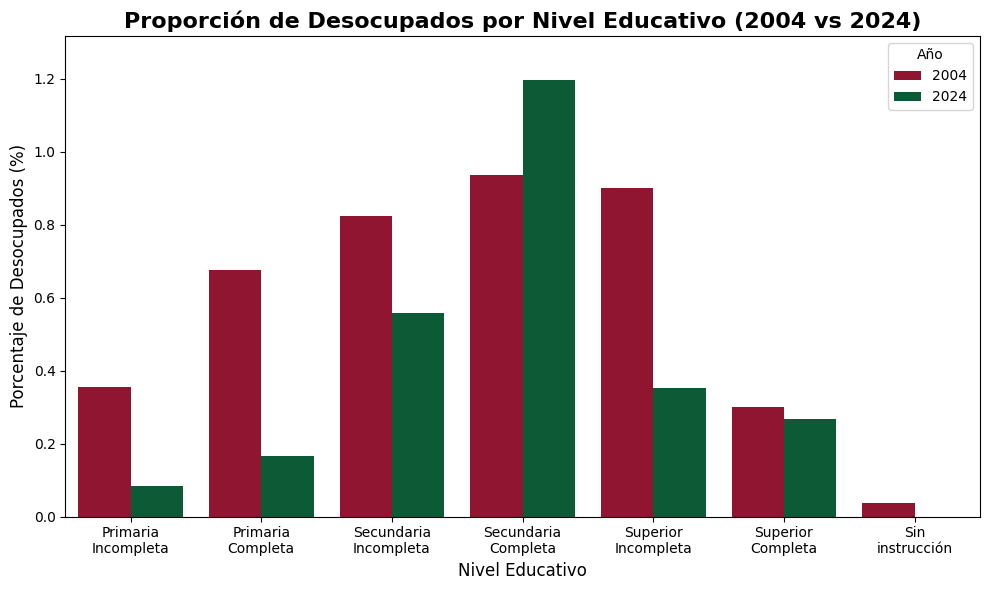

<ipython-input-154-d166a7220119>:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  eje.set_yticklabels([f'{round(float(y * 100), 2)}' for y in eje.get_yticks()]) # Porcentajes con 2 decimales
<ipython-input-154-d166a7220119>:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  eje.set_xticklabels([f'{x}' for x in edad_grupos_unicos])


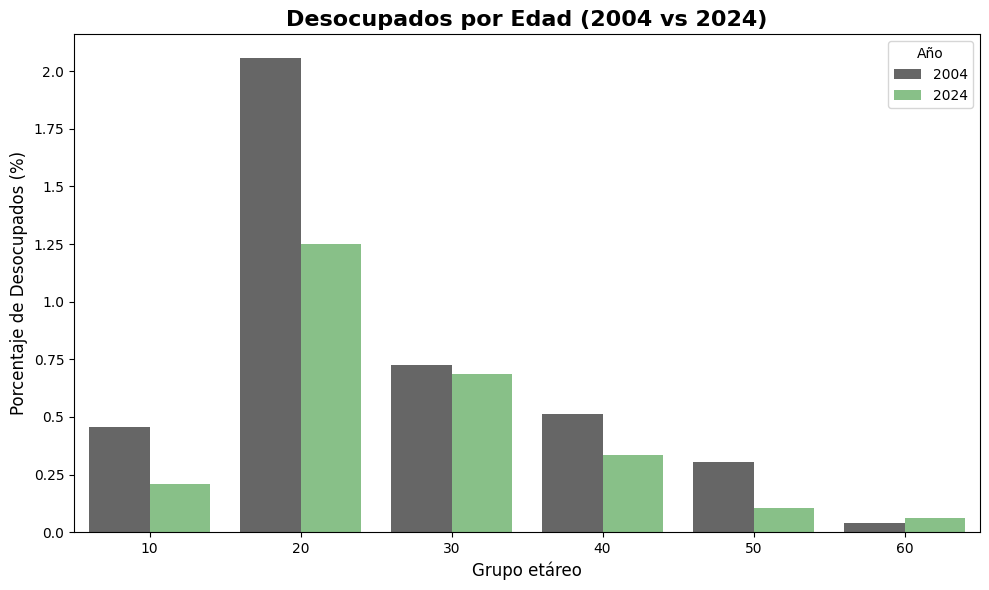

<ipython-input-154-d166a7220119>:121: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(round(y * 100))}' for y in ax.get_yticks()])
<ipython-input-154-d166a7220119>:121: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f'{int(round(y * 100))}' for y in ax.get_yticks()])


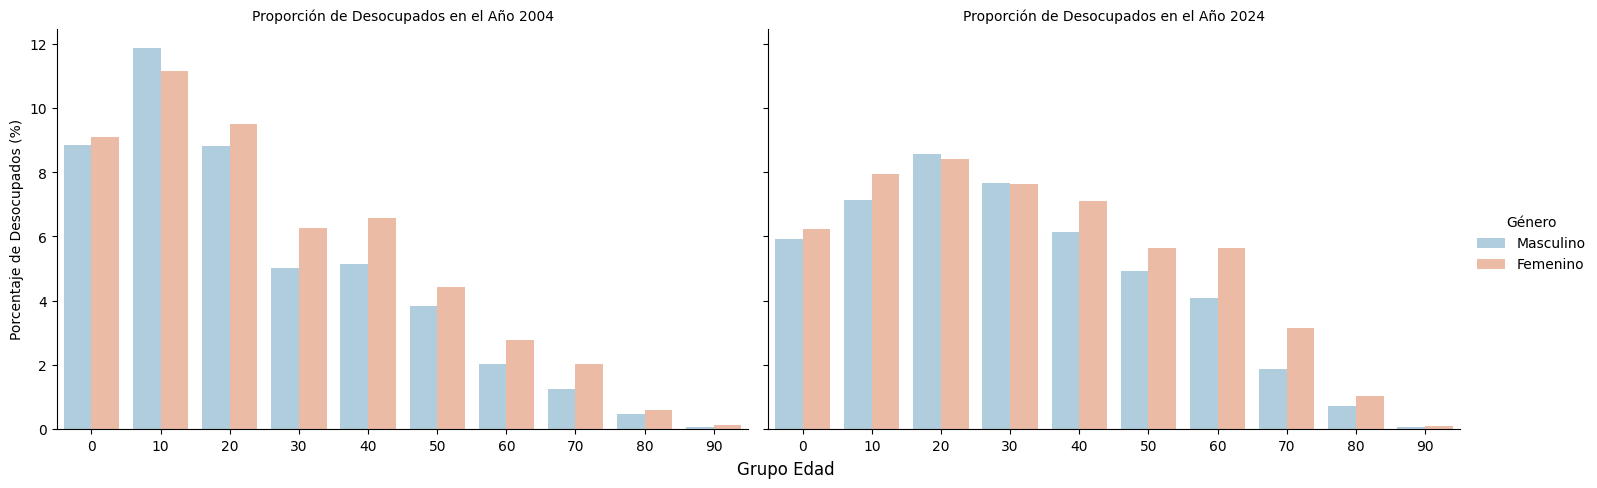

In [ ]:
# Iterar sobre la columna 'estado' y creamos una nueva columna 'desocupado'
# que vale 1 si lo son, 0 sino
respondieron.loc[(respondieron['estado'] == 2), 'desocupado'] = 1
respondieron.loc[respondieron['estado'].isin([1, 3, 4]), 'desocupado'] = 0

# chequeamos que se haya hecho bien
print(respondieron[['estado', 'desocupado']].sample(100))

anos = [2004, 2024]

# Recorremos cada a√±o y contamos las ocurrencias de "desocupado"
for ano in anos:
    # Usamos la funcion de contador en 'desocupado' para el corriente a√±o
    # Recordemos: funcion(dataframe, columna, condicion, a√±o)
    count_desocupados = contador(respondieron, 'desocupado', 1, anos=[ano])
    print(f"La cantidad de personas desocupadas en el a√±o {str(ano)} fue {count_desocupados}")

# Agrupamos por a√±o, nivel educativo y si est√°n desocupados
composicion_desocupados = respondieron.groupby(['ano4', 'nivel_ed', 'desocupado']).size().reset_index(name='count')

# Calcular la proporci√≥n de desocupados por nivel educativo y por a√±o
composicion_desocupados['total_por_ano'] = composicion_desocupados.groupby('ano4')['count'].transform('sum')
composicion_desocupados['proporcion_desocupados'] = composicion_desocupados['count'] / composicion_desocupados['total_por_ano']

# Filtrar solo los desocupados (desocupado == 1)
composicion_desocupados = composicion_desocupados[composicion_desocupados['desocupado'] == 1]

# Mapeamos valores numericos de nivel_ed a su descripcion
nivel_ed_mapeo = {
    1: "Primaria Incompleta",
    2: "Primaria Completa",
    3: "Secundaria Incompleta",
    4: "Secundaria Completa",
    5: "Superior Incompleta",
    6: "Superior Completa",
    7: "Sin instrucci√≥n",
    9: "Ns./Nr."
}
composicion_desocupados['nivel_ed'] = composicion_desocupados['nivel_ed'].map(nivel_ed_mapeo)


#GRAFICO 1
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=composicion_desocupados, x='nivel_ed', y='proporcion_desocupados', hue='ano4', palette='RdYlGn')

ax.set_ylabel("Porcentaje de Desocupados (%)", fontsize=12)
ax.set_ylim(0, composicion_desocupados['proporcion_desocupados'].max() * 1.1) # Limites del eje x
ax.set_yticklabels([f'{float(y * 100)}' for y in ax.get_yticks()]) # Queremos ver porcentajes

# Ajustar las etiquetas del eje x para que se muestren en varios reglones
labels = ax.get_xticklabels()
new_labels = [label.get_text().replace(" ", "\n") for label in labels]
ax.set_xticklabels(new_labels, rotation=0, ha='center', fontsize=10)

# Personalizar el gr√°fico
plt.title("Proporci√≥n de Desocupados por Nivel Educativo (2004 vs 2024)", fontsize=16, fontweight='bold')
plt.xlabel("Nivel Educativo", fontsize=12)
plt.legend(title="A√±o", loc="upper right")
plt.tight_layout()
plt.show()


# Crear la nueva columna 'edad_grupo' agrupada de a 10 a√±os
respondieron['edad_grupo'] = (respondieron['ch06'] // 10) * 10

# Agrupar por 'edad_grupo', 'desocupado' y 'ano4' para contar las cantidades
composicion_desocupados_edad = respondieron.groupby(['ano4', 'edad_grupo', 'desocupado']).size().reset_index(name='count')

# Calcular la proporci√≥n de desocupados por grupo de edad y por a√±o
composicion_desocupados_edad['total_por_ano'] = composicion_desocupados_edad.groupby('ano4')['count'].transform('sum')
composicion_desocupados_edad['proporcion_desocupados'] = composicion_desocupados_edad['count'] / composicion_desocupados_edad['total_por_ano']

# Filtrar solo los desocupados (desocupado == 1)
composicion_desocupados_edad = composicion_desocupados_edad[composicion_desocupados_edad['desocupado'] == 1]

# GRAFICO 2
# Gr√°fico de barras de proporciones de desocupados por grupo de edad y a√±o
plt.figure(figsize=(10, 6))
eje = sns.barplot(data=composicion_desocupados_edad, x='edad_grupo', y='proporcion_desocupados', hue='ano4', palette='Accent_r')
eje.set_ylabel("Porcentaje de Desocupados (%)", fontsize=12)
eje.set_yticklabels([f'{round(float(y * 100), 2)}' for y in eje.get_yticks()]) # Porcentajes con 2 decimales

# Filtrar valores √∫nicos que no sean NaN en 'edad_grupo' y convertirlos a int para etiquetas del eje x
# Como arranca desde 0 pero no hay valores observaciones all√≠, lo ajustamos
edad_grupos_unicos = [int(x+10) for x in sorted(respondieron['edad_grupo'].dropna().unique())]
eje.set_xticklabels([f'{x}' for x in edad_grupos_unicos])

# Personalizar el gr√°fico
plt.title("Desocupados por Edad (2004 vs 2024)", fontsize=16, fontweight='bold')
plt.xlabel("Grupo et√°reo", fontsize=12)
plt.legend(title="A√±o", loc="upper right")
plt.tight_layout()
plt.show()


# Agrupar por 'ano4', 'edad_grupo', 'ch04' (g√©nero) para contar las cantidades
composicion_genero_edad = respondieron.groupby(['ano4', 'edad_grupo', 'ch04']).size().reset_index(name='count')

# Calcular la proporci√≥n de desocupados por grupo de edad y por a√±o
composicion_genero_edad['total_por_ano'] = composicion_genero_edad.groupby('ano4')['count'].transform('sum')
composicion_genero_edad['proporcion_genero'] = composicion_genero_edad['count'] / composicion_genero_edad['total_por_ano']

# Mapeo para los g√©neros
composicion_genero_edad['Genero'] = composicion_genero_edad['ch04'].map({1: 'Masculino', 2: 'Femenino'})

#GRAFICO 3

# Gr√°fico de barras facetadas por a√±o
g = sns.FacetGrid(composicion_genero_edad, col="ano4", height=5, aspect=1.5, sharey=True)
g.map_dataframe(sns.barplot, x='edad_grupo', y='proporcion_genero', hue='Genero', palette='RdBu_r', dodge=True)
g.set_axis_labels("", "")
g.set_titles("Proporci√≥n de Desocupados en el A√±o {col_name}")
g.add_legend(title="G√©nero")

# Ajuste del dise√±o final para eliminar ejes duplicados y centrar la etiqueta del eje x
for ax in g.axes.flat:
    ax.set_ylabel("Porcentaje de Desocupados (%)")

# Establecer las etiquetas en formato de porcentaje para todos los subplots
for ax in g.axes.flat:
    ax.set_yticklabels([f'{int(round(y * 100))}' for y in ax.get_yticks()])

for ax in g.axes.flat:
    # Establecer posiciones para que coincidan con el n√∫mero de valores √∫nicos de 'edad_grupo'
    edad_grupos_un = sorted(respondieron['edad_grupo'].dropna().unique())

    ax.set_xticks(range(len(edad_grupos_un)))
    ax.set_xticklabels([f'{int(x)}' for x in edad_grupos_un])

plt.subplots_adjust(top=0.9, bottom=0.1)
g.fig.text(0.5, 0.01, "Grupo Edad", ha="center", fontsize=12)
# Graficamos
plt.show()


In [ ]:
# Guardar los DataFrames filtrados en archivos de Excel
respondieron.to_excel('respondieron.xlsx', index=False)

Ejercicio 10

In [ ]:
# Procedemos con la formula de desocupacion oficial siendo : Tasa de desocupacion = (Desocupados/PEA)*100
# Y tasa de desocupacion alternativa = (Desocupados/ PET) * 100

def calcular_tasas(df):

    # Calculamos la tasa de desocupaci√≥n seg√∫n el INDEC
    tasa_des_indec = ((respondieron['desocupado']==1).sum() / (respondieron['PEA']).sum()) * 100

    # Calculamos la tasa de desocupaci√≥n alternativa (desocupados sobre PET)
    tasa_des_alternativa = ((respondieron['desocupado']==1).sum() / (respondieron['PET']).sum()) * 100

    # Retornamos los resultados
    return {"Tasa de Desocupaci√≥n INDEC": round(float(tasa_des_indec),2), "Tasa de Desocupaci√≥n Alternativa": round(float(tasa_des_alternativa),2)}

# Llamamos a la funci√≥n con el DataFrame `respondieron`
resultados = calcular_tasas(respondieron)
print(resultados)


{'Tasa de Desocupaci√≥n INDEC': 8.06, 'Tasa de Desocupaci√≥n Alternativa': 5.12}


Creaci√≥n de dummies

In [ ]:
# Vamos a copiar el dataframe anterior para no perder la limpieza original
df_dummies = df_combined_tydy2.copy()

def create_dummies_with_nan(df, column, mapping_dict):
    """
    Crea columnas a partir de una variable categ√≥rica, conservando NaN en los datos originales
    y eliminando la columna original
    Cada categor√≠a en mapping_dict crear√° una columna dummy independiente con 1, 0 y NaN.

    Par√°metros:
    - df (pd.DataFrame): DataFrame que se modificar√°.
    - column (str): Columna a partir de la cual se crear√°n las dummies.
    - mapping_dict (dict): Asignaci√≥n de categor√≠as a sus valores num√©ricos o etiquetas.

    Devuelve:
    - pd.DataFrame: DataFrame con dummies a√±adidas y sin la variable categ√≥rica original.
    """
    for label, value in mapping_dict.items():
        df[label] = df[column].apply(lambda x: 1 if x == value else (0 if pd.notna(x) else np.nan))
    df.drop(column, axis=1, inplace=True)
    return df


# Aplicamos la funci√≥n a las variables categ√≥ricas usando los diccionarios ya definidos
df_dummies = create_dummies_with_nan(df_dummies, 'ch04', ch04_mapping)
df_dummies = create_dummies_with_nan(df_dummies, 'ch07', ch07_mapping)
df_dummies = create_dummies_with_nan(df_dummies, 'ch08', ch08_mapping)
df_dummies = create_dummies_with_nan(df_dummies, 'nivel_ed', nivel_ed_mapping)
df_dummies = create_dummies_with_nan(df_dummies, 'estado', estado_mapping)
df_dummies = create_dummies_with_nan(df_dummies, 'cat_inac', cat_inac_mapping)

print(df_dummies.head())

     codusu  nro_hogar componente h15  ano4       trimestre region mas_500  \
0  125064          1.0        1.0  S√≠  2004  1er. Trimestre    NEA       N   
1  125064          1.0        2.0  S√≠  2004  1er. Trimestre    NEA       N   
2  125090          1.0        1.0  S√≠  2004  1er. Trimestre    NEA       N   
3  125090          1.0        2.0  S√≠  2004  1er. Trimestre    NEA       N   
4  125090          1.0        3.0  S√≠  2004  1er. Trimestre    NEA       N   

  aglomerado  pondera  ... Desocupado  Inactivo Menor de 10 a√±os  \
0    Posadas    137.0  ...        0.0       1.0              0.0   
1    Posadas    137.0  ...        0.0       1.0              0.0   
2    Posadas     99.0  ...        0.0       0.0              0.0   
3    Posadas     99.0  ...        0.0       0.0              0.0   
4    Posadas     99.0  ...        0.0       1.0              0.0   

  Jubilado/pensionado Rentista Estudiante Ama de casa Menor de 6 a√±os  \
0                 1.0      0.0        0.0 